In [454]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [428]:
"""
    Downscale an image to a target resolution (below max_res), keeping aspect ratio.
    Returns the low-res and low-bitrate image image.
"""
def make_low_resolution(img, max_res=100, jpeg_quality=20):
    h, w = img.shape[:2]
    aspect_ratio = w/h

    if w > h:
        new_w = max_res
        new_h = int(new_w / aspect_ratio)
    else:
        new_h = max_res
        new_w = int(new_h * aspect_ratio)

    low_res = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), jpeg_quality]
    result, encimg = cv2.imencode('.jpg', low_res, encode_param)
    if result:
        low_res = cv2.imdecode(encimg, 1)
    
    return low_res

In [561]:
img = cv2.imread("data/normal/2.jpg")
low_res_img = make_low_resolution(img, max_res=55, jpeg_quality=80)

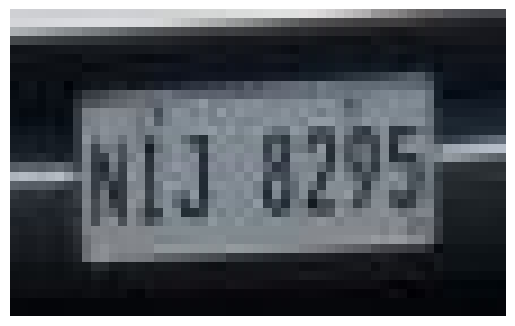

In [563]:
plt.imshow(cv2.cvtColor(low_res_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [577]:
out_dir = os.path.join('data', 'low_qual')
in_dir = os.path.join('data', 'normal')
files = os.listdir(in_dir)

min_rs = 45
max_rs = 100
min_qual = 20
max_qual = 90

57 34
Saved cropped plate: data\low_qual/1.jpg.jpg


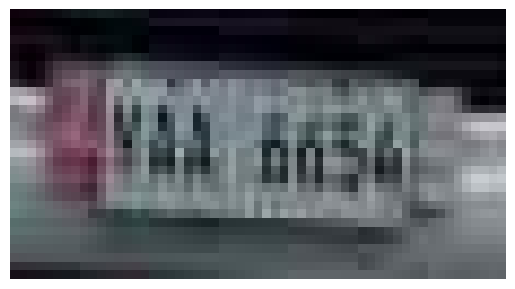

73 54
Saved cropped plate: data\low_qual/10.jpg.jpg


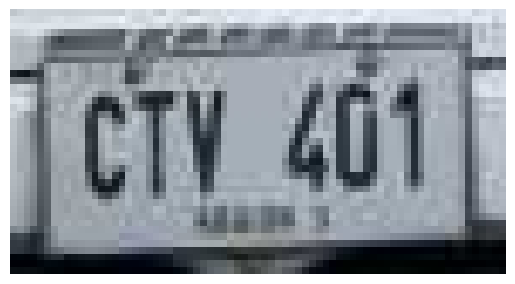

74 63
Saved cropped plate: data\low_qual/11.jpg.jpg


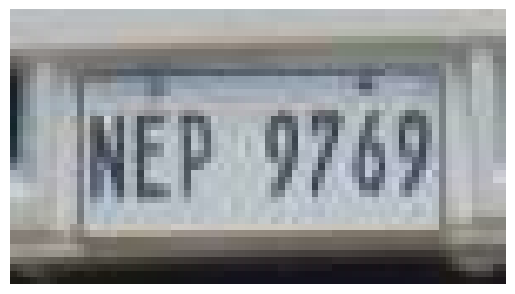

76 29
Saved cropped plate: data\low_qual/12.jpg.jpg


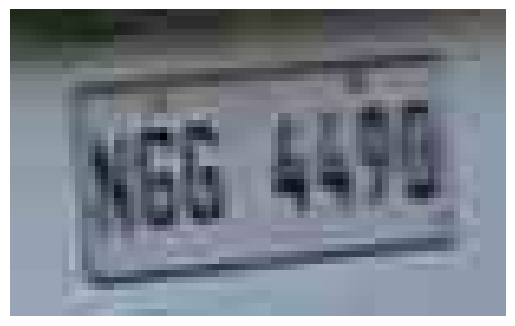

72 79
Saved cropped plate: data\low_qual/13.jpg.jpg


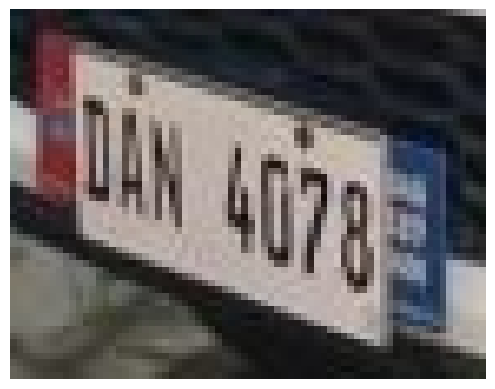

55 27
Saved cropped plate: data\low_qual/14.jpg.jpg


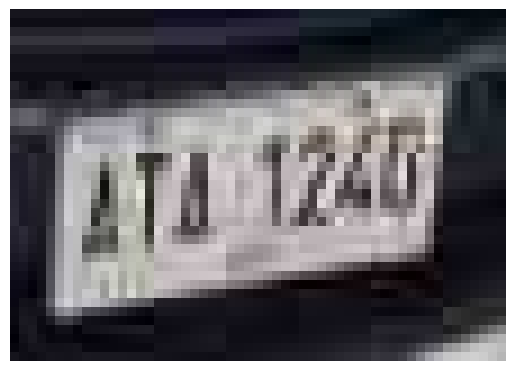

78 89
Saved cropped plate: data\low_qual/15.jpg.jpg


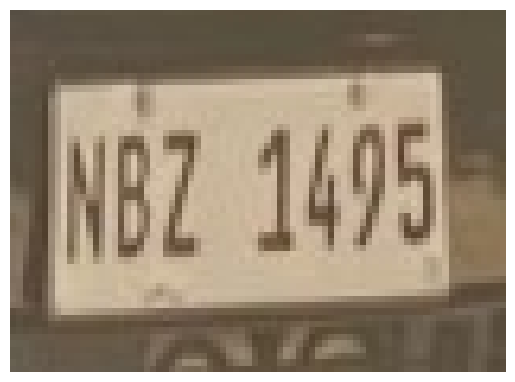

81 27
Saved cropped plate: data\low_qual/16.jpg.jpg


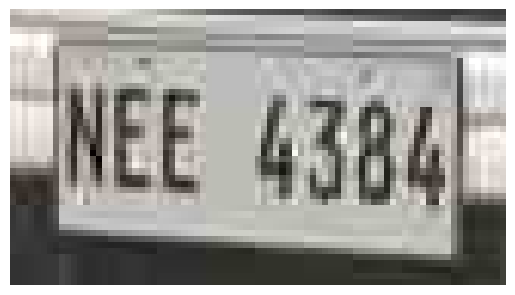

84 47
Saved cropped plate: data\low_qual/17.jpg.jpg


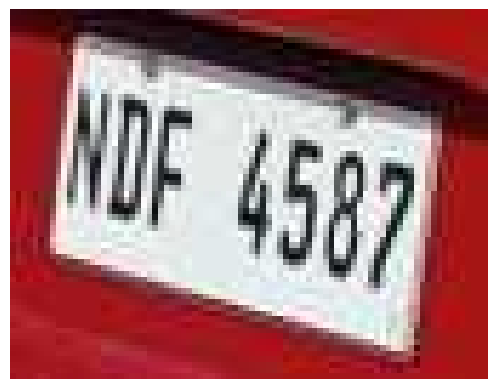

64 74
Saved cropped plate: data\low_qual/18.jpg.jpg


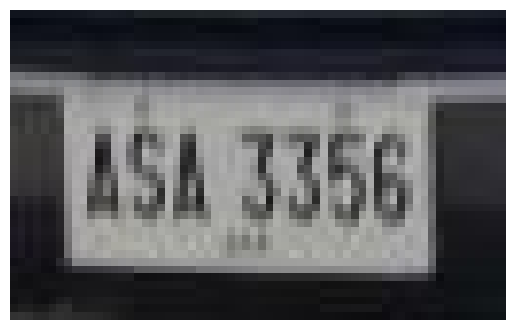

49 25
Saved cropped plate: data\low_qual/19.jpg.jpg


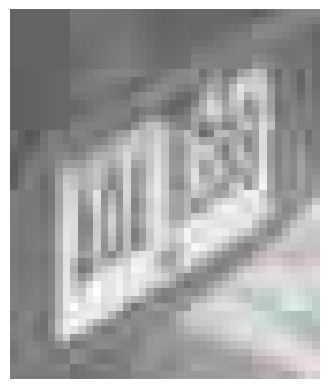

58 72
Saved cropped plate: data\low_qual/2.jpg.jpg


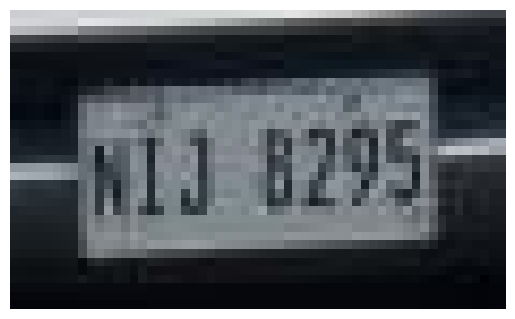

81 26
Saved cropped plate: data\low_qual/20.jpg.jpg


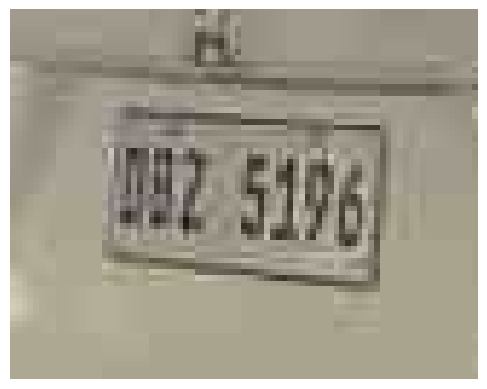

62 82
Saved cropped plate: data\low_qual/21.jpg.jpg


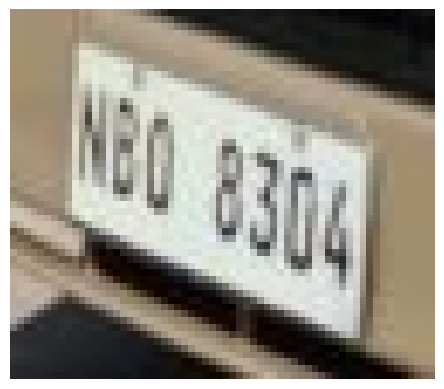

90 53
Saved cropped plate: data\low_qual/22.jpg.jpg


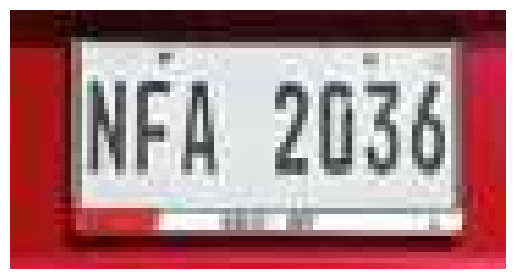

54 26
Saved cropped plate: data\low_qual/23.jpg.jpg


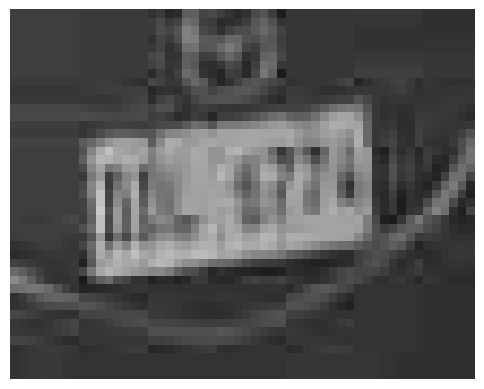

94 72
Saved cropped plate: data\low_qual/24.jpg.jpg


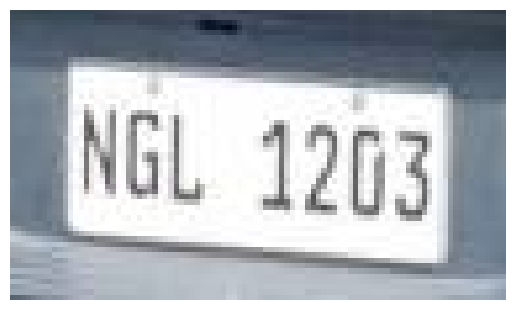

50 42
Saved cropped plate: data\low_qual/25.jpg.jpg


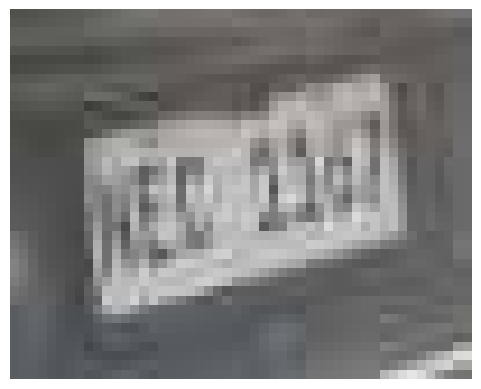

96 43
Saved cropped plate: data\low_qual/26.jpg.jpg


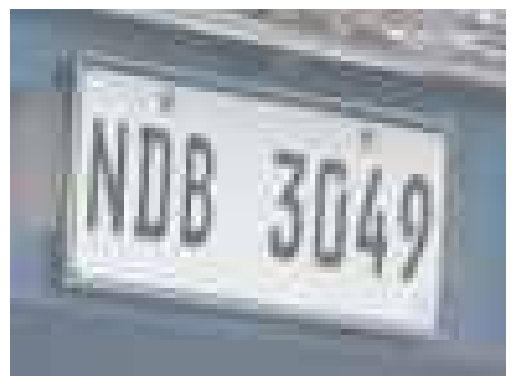

51 78
Saved cropped plate: data\low_qual/27.jpg.jpg


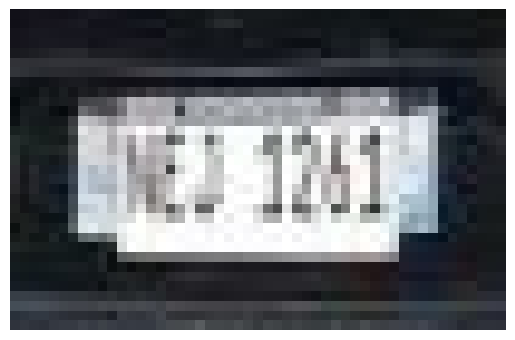

71 86
Saved cropped plate: data\low_qual/28.jpg.jpg


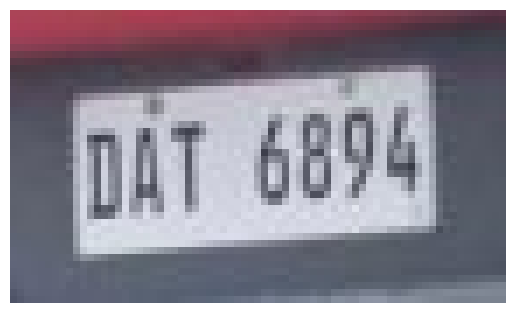

85 88
Saved cropped plate: data\low_qual/29.jpg.jpg


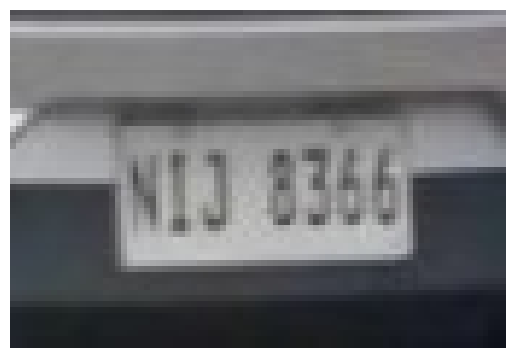

82 55
Saved cropped plate: data\low_qual/3.jpg.jpg


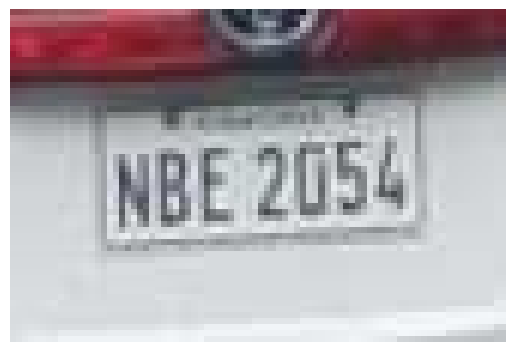

58 67
Saved cropped plate: data\low_qual/30.jpg.jpg


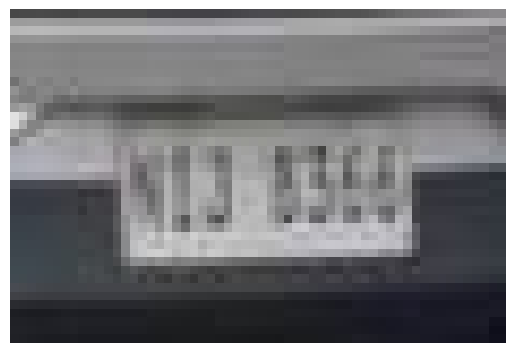

100 54
Saved cropped plate: data\low_qual/31.jpg.jpg


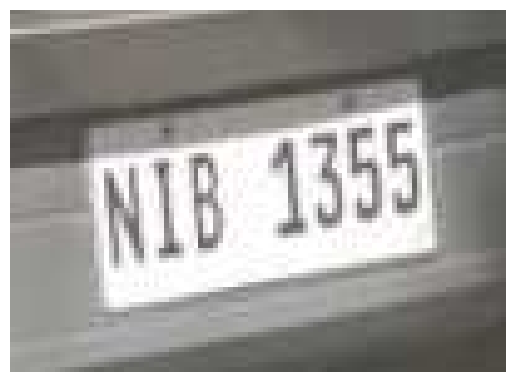

58 33
Saved cropped plate: data\low_qual/32.jpg.jpg


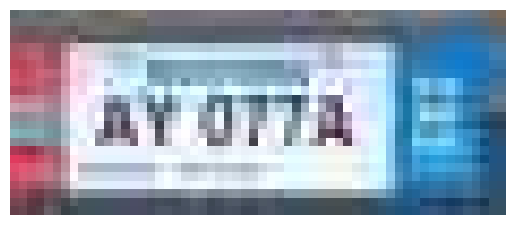

99 65
Saved cropped plate: data\low_qual/33.jpg.jpg


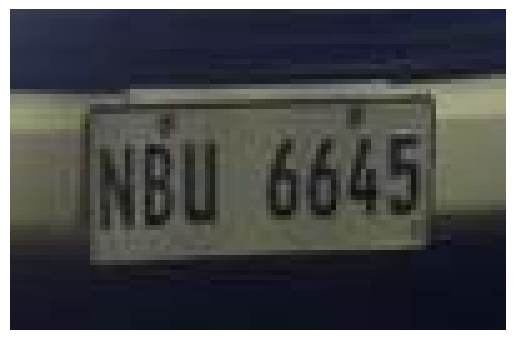

93 27
Saved cropped plate: data\low_qual/34.jpg.jpg


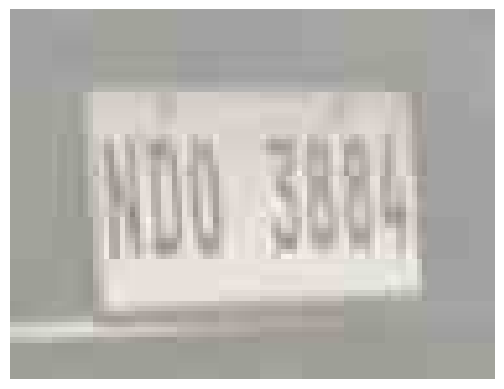

89 53
Saved cropped plate: data\low_qual/35.jpg.jpg


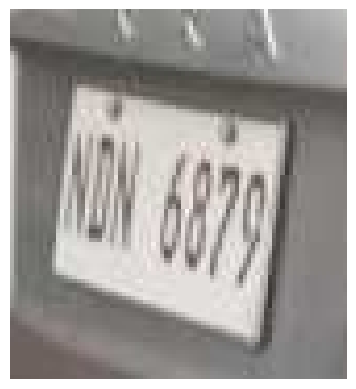

85 74
Saved cropped plate: data\low_qual/36.jpg.jpg


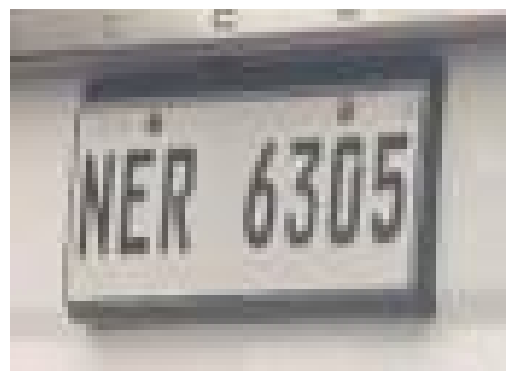

90 59
Saved cropped plate: data\low_qual/37.jpg.jpg


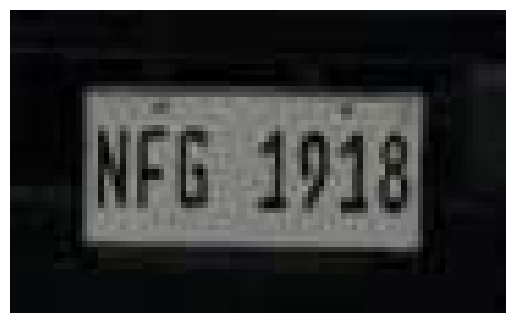

98 33
Saved cropped plate: data\low_qual/38.jpg.jpg


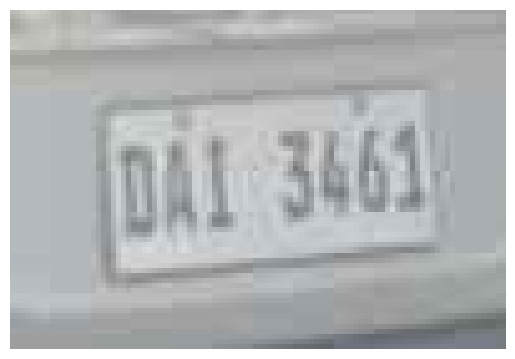

51 49
Saved cropped plate: data\low_qual/39.jpg.jpg


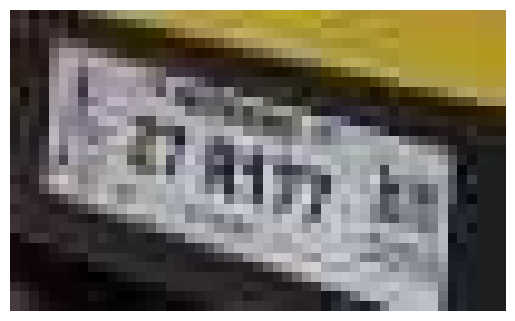

97 62
Saved cropped plate: data\low_qual/4.jpg.jpg


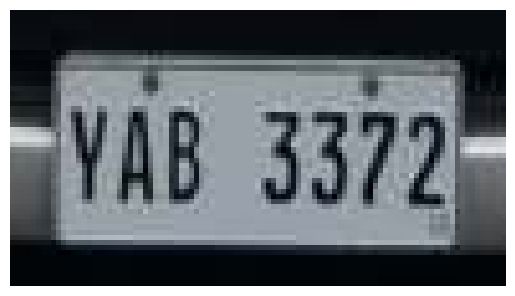

56 85
Saved cropped plate: data\low_qual/40.jpg.jpg


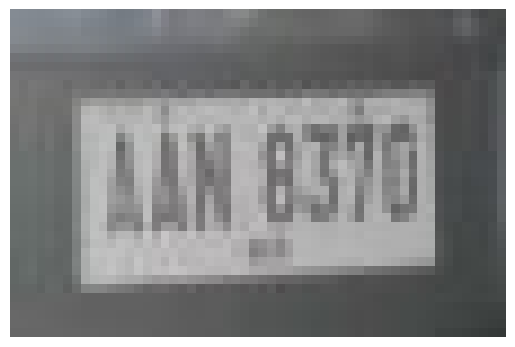

84 26
Saved cropped plate: data\low_qual/41.jpg.jpg


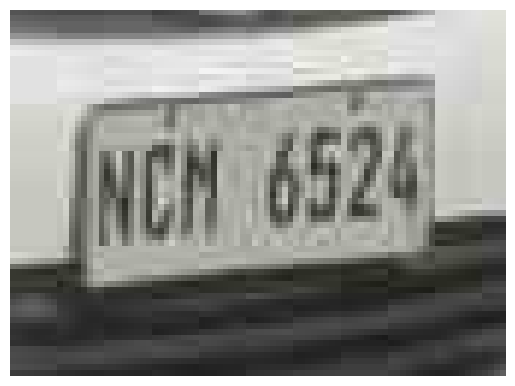

47 26
Saved cropped plate: data\low_qual/42.jpg.jpg


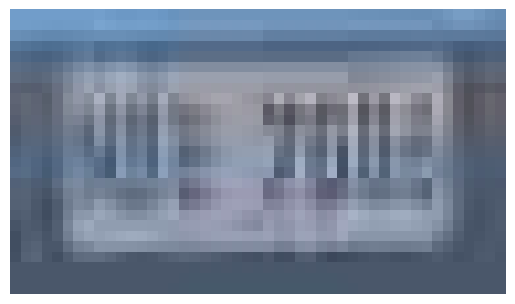

73 37
Saved cropped plate: data\low_qual/43.jpg.jpg


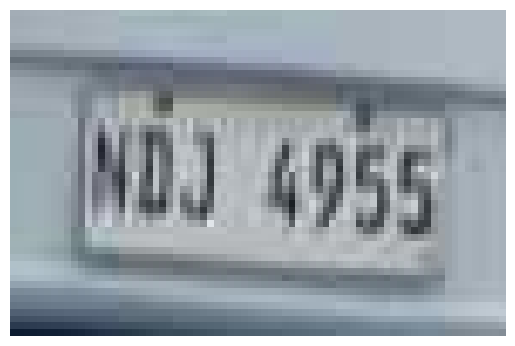

58 54
Saved cropped plate: data\low_qual/44.jpg.jpg


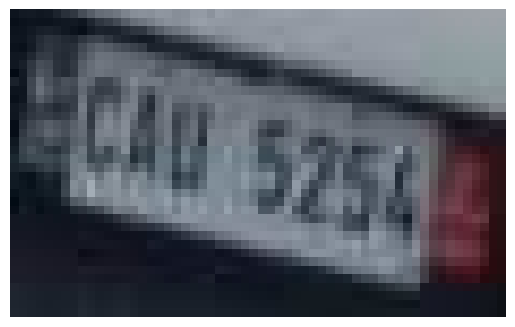

77 89
Saved cropped plate: data\low_qual/45.jpg.jpg


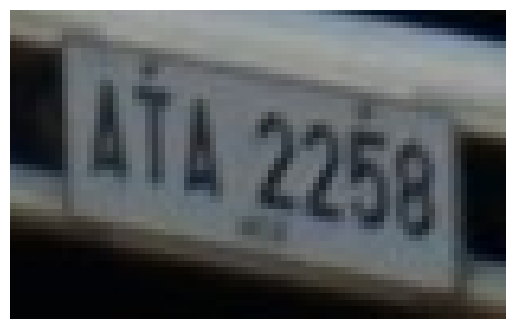

49 52
Saved cropped plate: data\low_qual/46.jpg.jpg


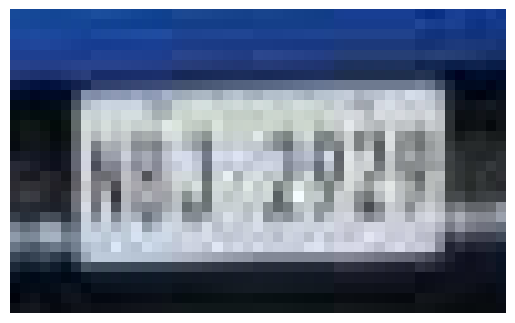

47 82
Saved cropped plate: data\low_qual/47.jpg.jpg


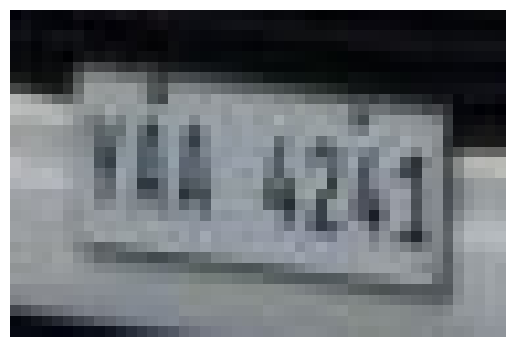

84 34
Saved cropped plate: data\low_qual/48.jpg.jpg


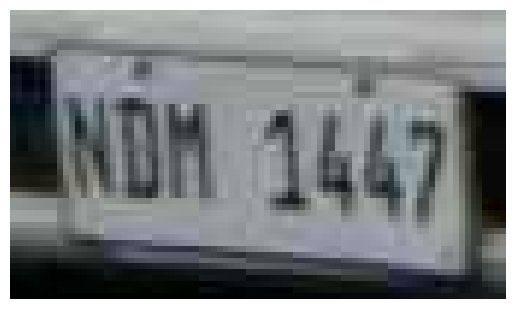

92 80
Saved cropped plate: data\low_qual/49.jpg.jpg


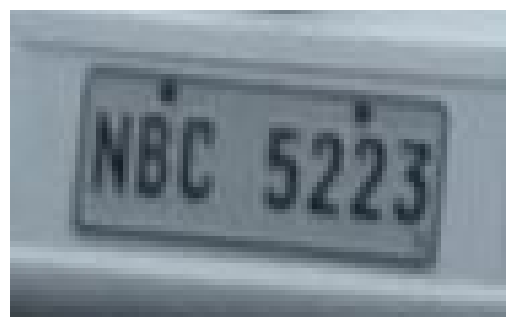

87 44
Saved cropped plate: data\low_qual/5.jpg.jpg


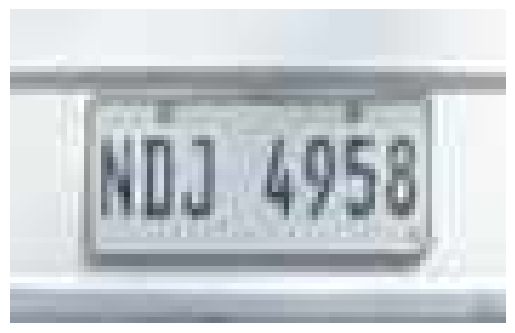

95 48
Saved cropped plate: data\low_qual/50.jpg.jpg


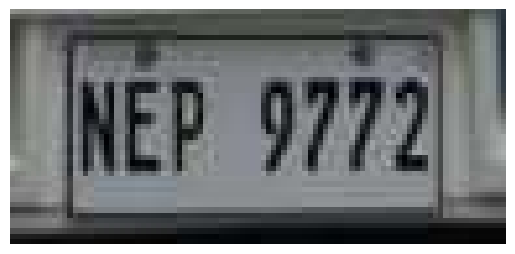

58 50
Saved cropped plate: data\low_qual/51.jpg.jpg


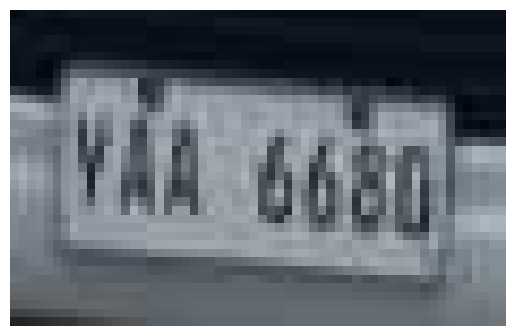

91 36
Saved cropped plate: data\low_qual/52.jpg.jpg


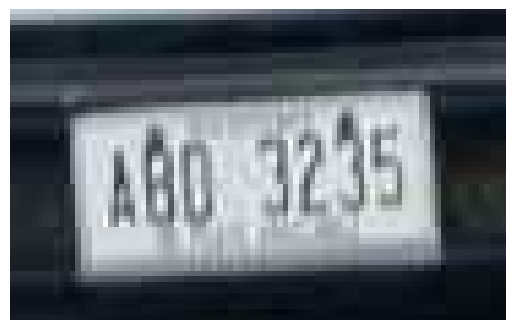

56 43
Saved cropped plate: data\low_qual/53.jpg.jpg


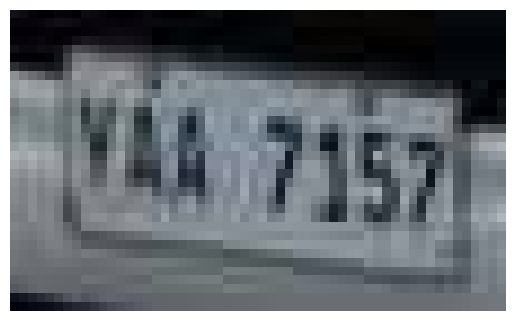

48 45
Saved cropped plate: data\low_qual/54.jpg.jpg


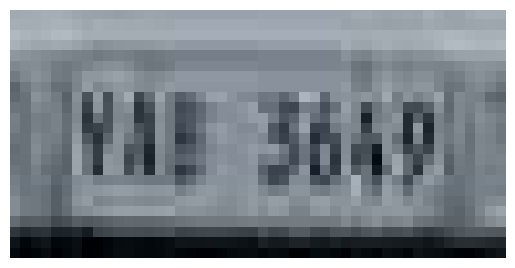

66 58
Saved cropped plate: data\low_qual/55.jpg.jpg


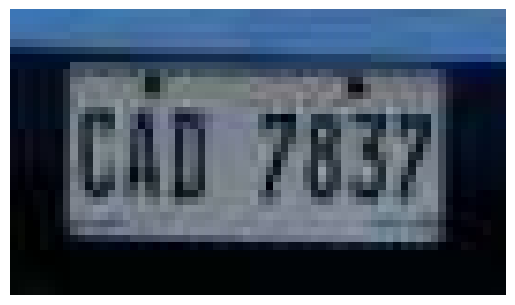

81 78
Saved cropped plate: data\low_qual/56.jpg.jpg


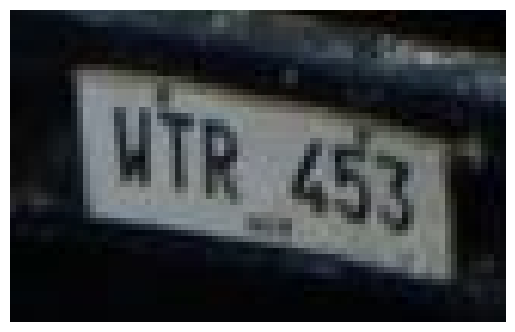

98 20
Saved cropped plate: data\low_qual/57.jpg.jpg


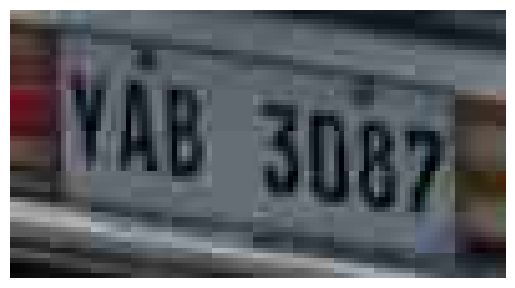

85 47
Saved cropped plate: data\low_qual/58.jpg.jpg


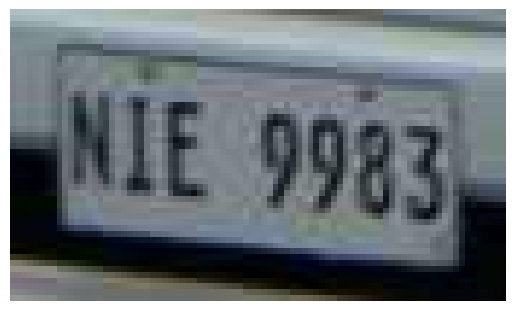

85 90
Saved cropped plate: data\low_qual/59.jpg.jpg


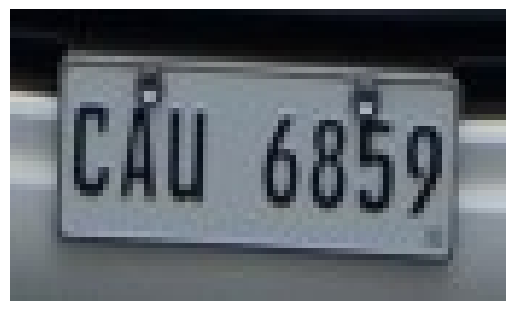

63 88
Saved cropped plate: data\low_qual/6.jpg.jpg


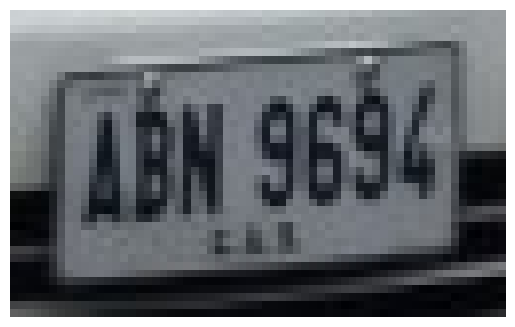

80 47
Saved cropped plate: data\low_qual/60.jpg.jpg


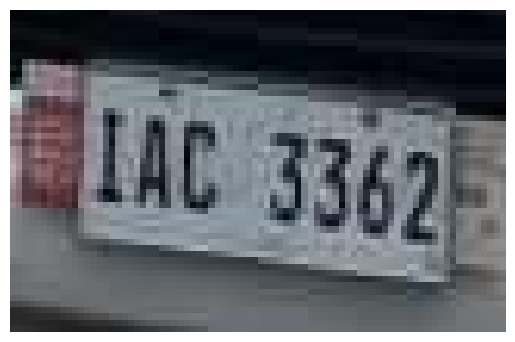

50 69
Saved cropped plate: data\low_qual/61.jpg.jpg


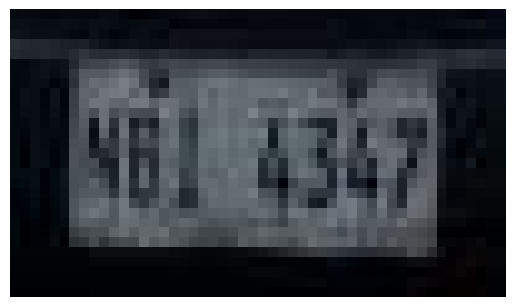

92 72
Saved cropped plate: data\low_qual/62.jpg.jpg


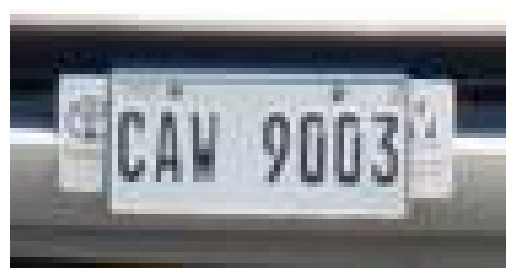

52 45
Saved cropped plate: data\low_qual/7.jpg.jpg


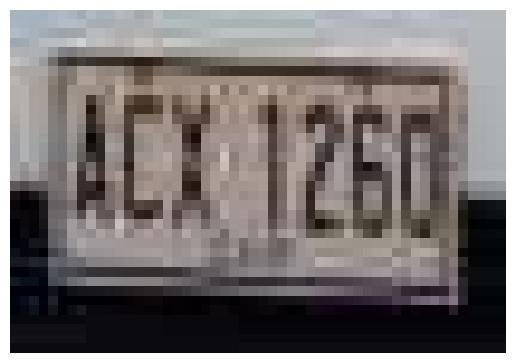

71 67
Saved cropped plate: data\low_qual/8.jpg.jpg


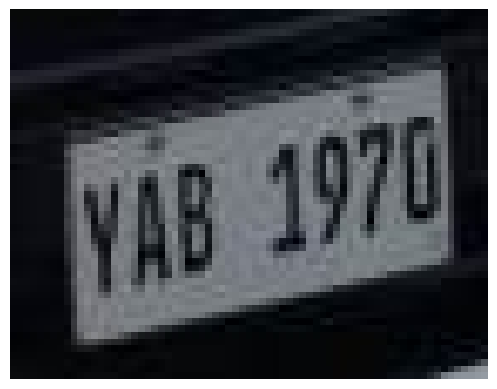

69 33
Saved cropped plate: data\low_qual/9.jpg.jpg


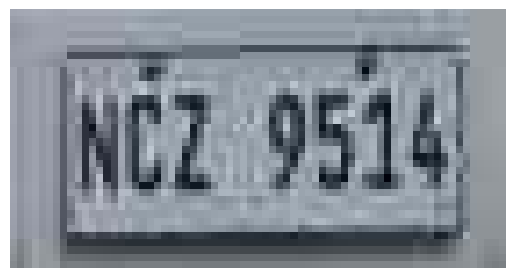

In [593]:
for image_name in files:
    img = cv2.imread(os.path.join(in_dir, image_name))
    rn_res = random.randint(min_rs, max_rs)
    rn_qual = random.randint(min_qual, max_qual)
    print(rn_res, rn_qual)

    low_res_img = make_low_resolution(img, max_res=rn_res, jpeg_quality=rn_qual)

    filename = f'{out_dir}/{image_name}.jpg'
    cv2.imwrite(filename, low_res_img)
    print(f'Saved cropped plate: {filename}')
    
    plt.imshow(cv2.cvtColor(low_res_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()